In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("train.csv")
df.shape

(42000, 785)

In [5]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [128]:
df_Y=df["label"]
Yp=df_Y.values
Y=Yp[:41900]
Y_test=Yp[41901:]
Y_test.shape

(99,)

In [129]:
df_X=df.drop(columns="label")
Xp=df_X.values
X=Xp[:41900,:]
X.shape
X_test=Xp[41901:,:]
X_test.shape

(99, 784)

In [16]:
df_X.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [24]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

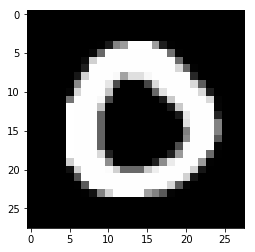

In [33]:
#Visualize Samples

def drawImg(sample):
    img=sample.reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawImg(X[4])

In [97]:
def Edist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def KNN(X,Y,query,k=5):
    
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=Edist(query,X[i])
        vals.append((d,Y[i]))
    
    vals=sorted(vals)
    
    vals=vals[:k]
    
    vals=np.array(vals)
    
    
    vals_with_index=np.unique(vals[:,1],return_counts=True)
    index=(vals_with_index[1]).argmax()
    prediction=vals_with_index[0][index]
    
    return prediction
        
        

In [137]:
pred=KNN(X,Y,X_test[4])
pred

5.0

In [135]:
Y_test[4]

5